In [ ]:
from google.colab import files
uploaded = files.upload()

Saving po2_data.csv to po2_data.csv


In [ ]:
import pandas as pd
import numpy as np

data = pd.read_csv(r'C:\Users\Administrator\Downloads\po2_data.csv')
data.head()

,subject#,age,sex,test_time,motor_updrs,total_updrs,jitter(%),jitter(abs),jitter(rap),jitter(ppq5),...,shimmer(abs),shimmer(apq3),shimmer(apq5),shimmer(apq11),shimmer(dda),nhr,hnr,rpde,dfa,ppe
0,1,72,0,5.6431,28.199,34.398,0.00662,0.000034,0.00401,0.00317,...,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006
1,1,72,0,12.6660,28.447,34.894,0.00300,0.000017,0.00132,0.00150,...,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810
2,1,72,0,19.6810,28.695,35.389,0.00481,0.000025,0.00205,0.00208,...,0.181,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.21014
3,1,72,0,25.6470,28.905,35.810,0.00528,0.000027,0.00191,0.00264,...,0.327,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.33277
4,1,72,0,33.6420,29.187,36.375,0.00335,0.000020,0.00093,0.00130,...,0.176,0.00679,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.19361


In [ ]:
data.shape

(5875, 22)

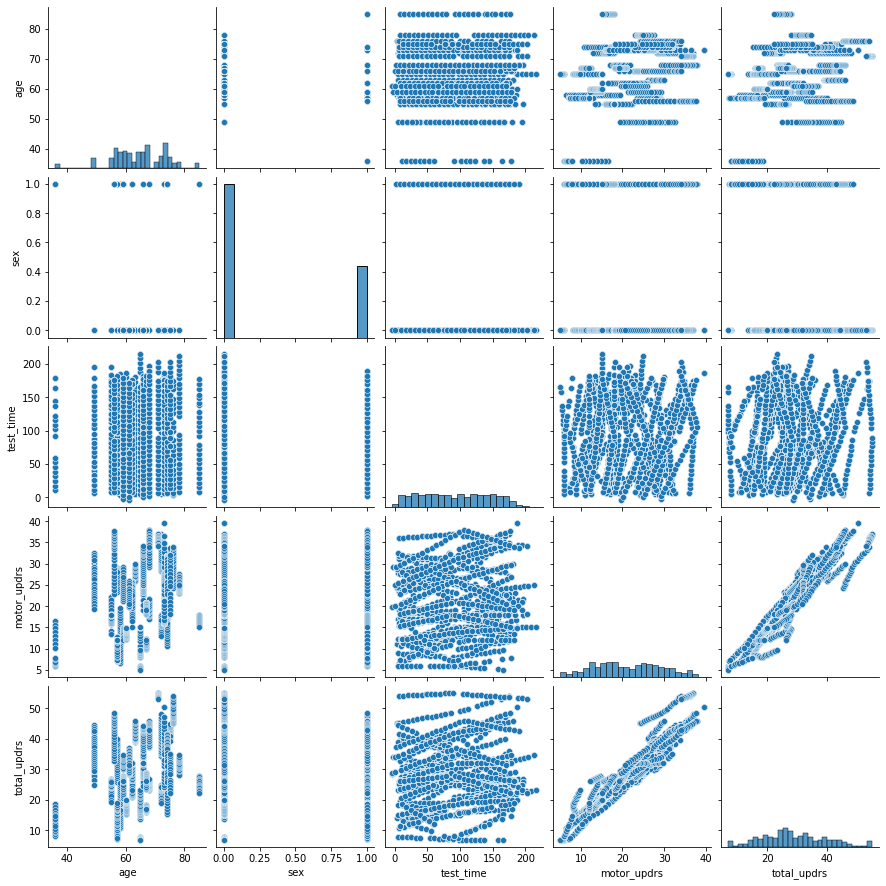

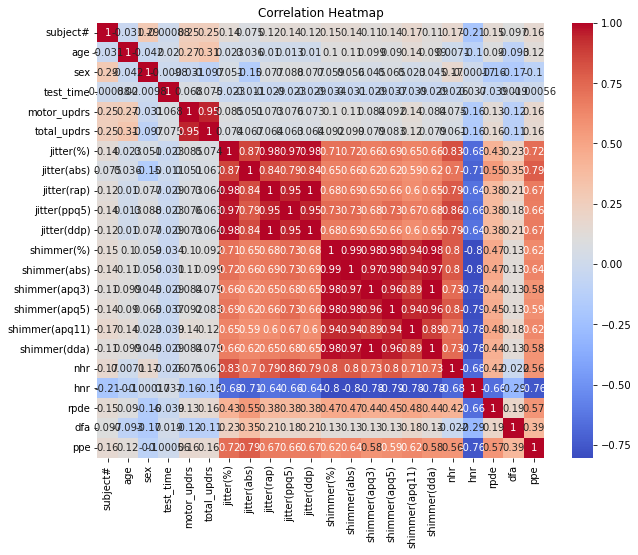

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Data Exploration and Visualization
# Let's start by exploring and visualizing the data
sns.pairplot(data[['age', 'sex', 'test_time', 'motor_updrs', 'total_updrs']])
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


# Drop irrelevant columns
data = data.drop(['subject#'], axis=1)

In [ ]:
# Splitting data into features (X) and target variables (y)
X = data.drop(['motor_updrs', 'total_updrs'], axis=1)
y_motor = data['motor_updrs']
y_total = data['total_updrs']

# Splitting data into training and testing sets
X_train, X_test, y_train_motor, y_test_motor, y_train_total, y_test_total = train_test_split(
    X, y_motor, y_total, test_size=0.2, random_state=42)


In [ ]:
# Linear regression model for motor UPDRS score
model_motor = LinearRegression()
model_motor.fit(X_train, y_train_motor)

# Linear regression model for total UPDRS score
model_total = LinearRegression()
model_total.fit(X_train, y_train_total)

# Predictions
y_pred_motor = model_motor.predict(X_test)
y_pred_total = model_total.predict(X_test)

# Model evaluation
mse_motor = mean_squared_error(y_test_motor, y_pred_motor)
r2_motor = r2_score(y_test_motor, y_pred_motor)

mse_total = mean_squared_error(y_test_total, y_pred_total)
r2_total = r2_score(y_test_total, y_pred_total)

print("Motor UPDRS Prediction:")
print("Mean Squared Error:", mse_motor)
print("R-squared:", r2_motor)
print("\nTotal UPDRS Prediction:")
print("Mean Squared Error:", mse_total)
print("R-squared:", r2_total)


Motor UPDRS Prediction:
Mean Squared Error: 56.014197221578016
R-squared: 0.12243652571440056

Total UPDRS Prediction:
Mean Squared Error: 93.30672070273098
R-squared: 0.15798070419827337


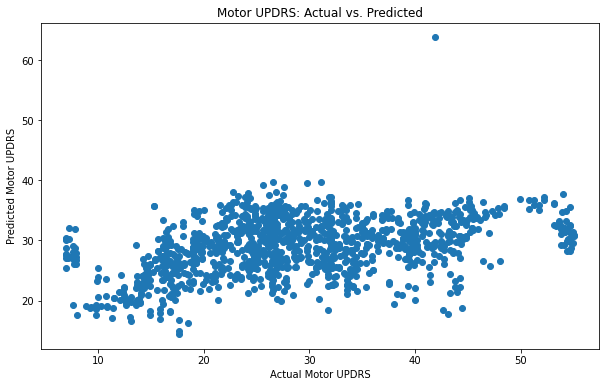

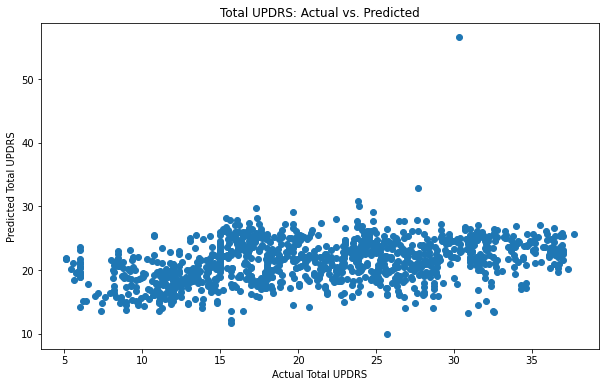

In [ ]:
# Visualize predictions vs. actual values

plt.figure(figsize=(10, 6))
plt.scatter(y_test_total, y_pred_total)
plt.xlabel("Actual Motor UPDRS")
plt.ylabel("Predicted Motor UPDRS")
plt.title("Motor UPDRS: Actual vs. Predicted")
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(y_test_motor, y_pred_motor)
plt.xlabel("Actual Total UPDRS")
plt.ylabel("Predicted Total UPDRS")
plt.title("Total UPDRS: Actual vs. Predicted")
plt.show()

# Project objective 2

## Task 3 & 4

In [ ]:
import pandas as pd

# Load the dataset
data = pd.read_csv('./po2_data.csv')

# Display the first few rows of the dataset
data.head()


,subject#,age,sex,test_time,motor_updrs,total_updrs,jitter(%),jitter(abs),jitter(rap),jitter(ppq5),...,shimmer(abs),shimmer(apq3),shimmer(apq5),shimmer(apq11),shimmer(dda),nhr,hnr,rpde,dfa,ppe
0,1,72,0,5.6431,28.199,34.398,0.00662,0.000034,0.00401,0.00317,...,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006
1,1,72,0,12.6660,28.447,34.894,0.00300,0.000017,0.00132,0.00150,...,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810
2,1,72,0,19.6810,28.695,35.389,0.00481,0.000025,0.00205,0.00208,...,0.181,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.21014
3,1,72,0,25.6470,28.905,35.810,0.00528,0.000027,0.00191,0.00264,...,0.327,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.33277
4,1,72,0,33.6420,29.187,36.375,0.00335,0.000020,0.00093,0.00130,...,0.176,0.00679,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.19361


## Exploratory Data Analysis ( Distribution of Variables )

C:\Users\Xande\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Xande\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Xande\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Xande\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na opti

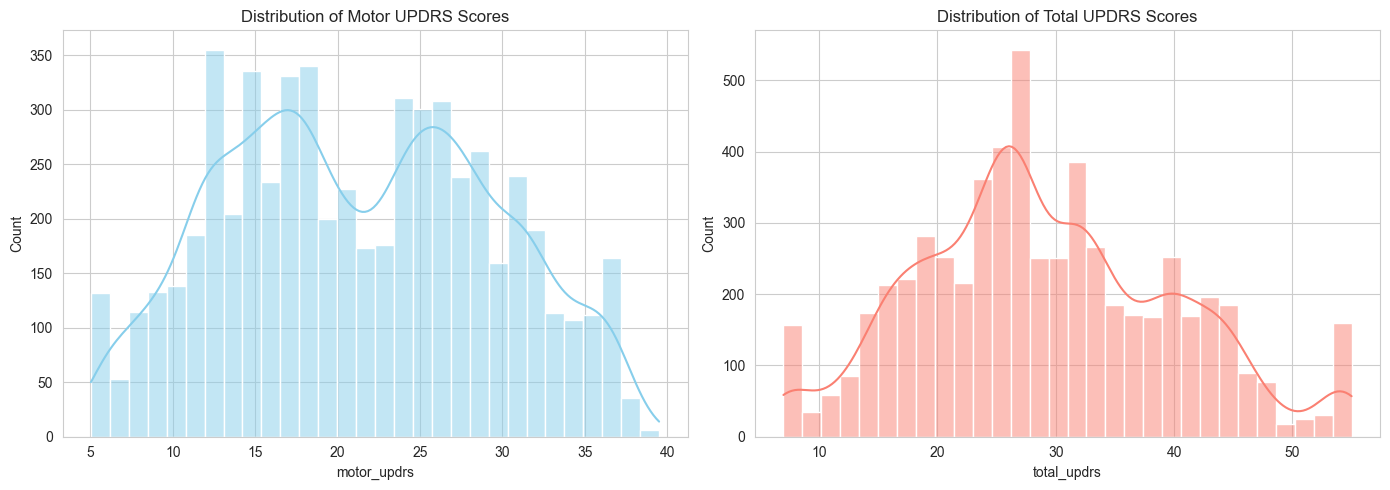

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for plots
sns.set_style("whitegrid")

# Initialize the figure
plt.figure(figsize=(14, 5))

# Create subplots for motor_updrs and total_updrs distributions
plt.subplot(1, 2, 1)
sns.histplot(data['motor_updrs'], kde=True, bins=30, color='skyblue')
plt.title('Distribution of Motor UPDRS Scores')

plt.subplot(1, 2, 2)
sns.histplot(data['total_updrs'], kde=True, bins=30, color='salmon')
plt.title('Distribution of Total UPDRS Scores')

plt.tight_layout()
plt.show()

## Exploratory Data Analysis ( Scatter Plots for Checking Outliers )

C:\Users\Xande\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Xande\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Xande\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Xande\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

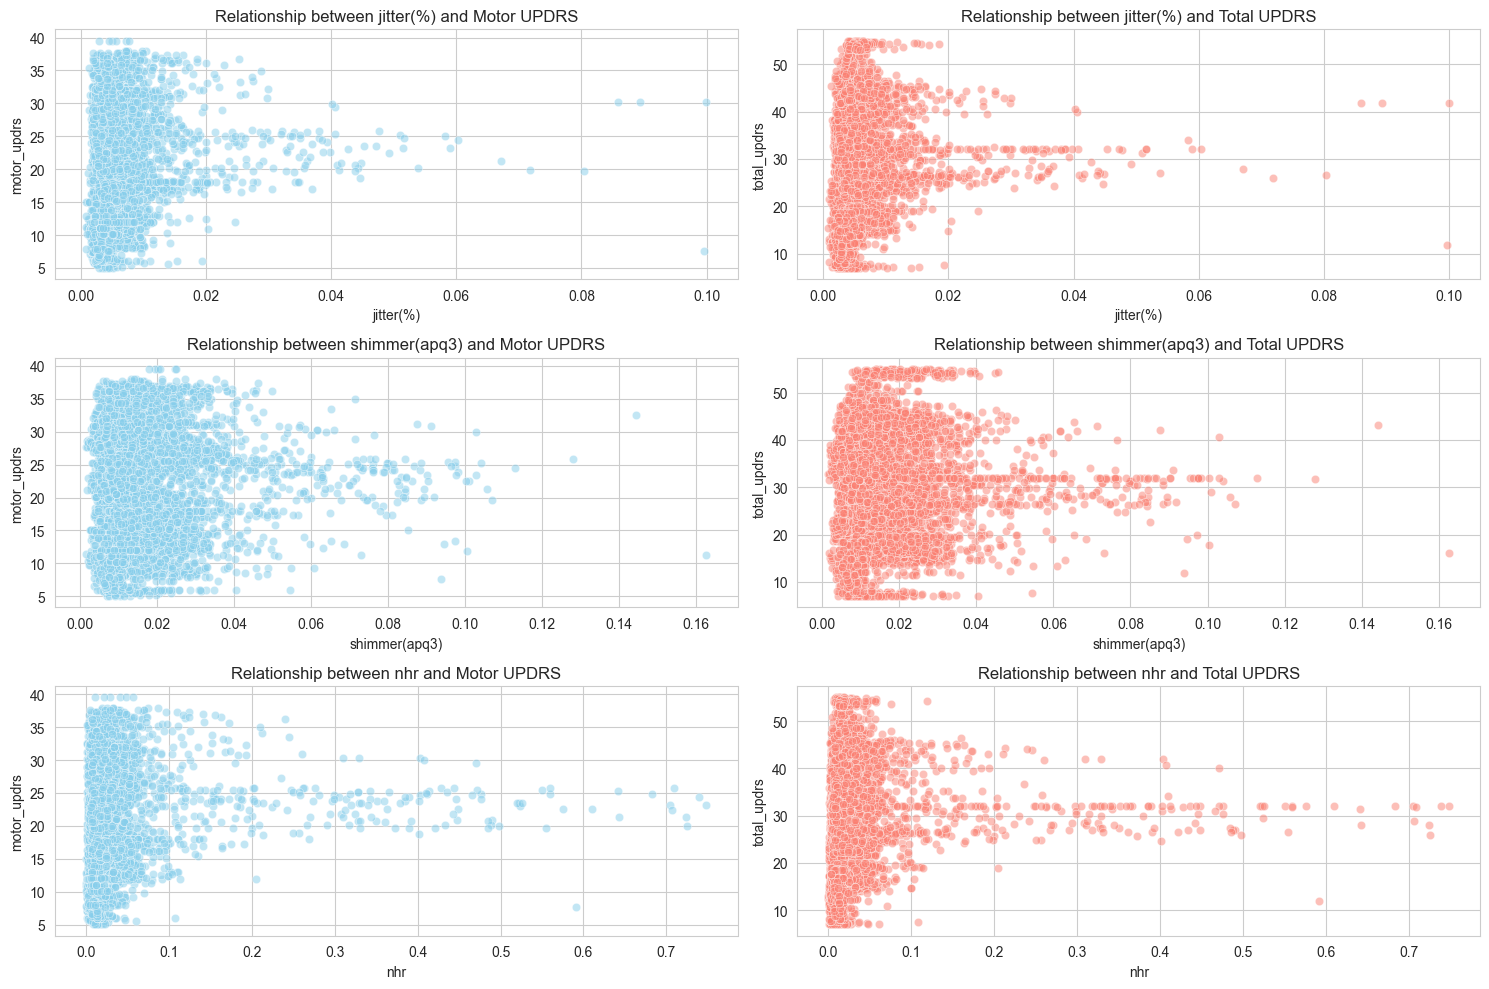

In [ ]:
# Initialize the figure
plt.figure(figsize=(15, 10))

# List of voice measures to visualize
voice_measures = ['jitter(%)', 'shimmer(apq3)', 'nhr']

for i, measure in enumerate(voice_measures, 1):
    # Relationship with motor_updrs
    plt.subplot(3, 2, 2*i-1)
    sns.scatterplot(x=measure, y='motor_updrs', data=data, color='skyblue', alpha=0.5)
    plt.title(f'Relationship between {measure} and Motor UPDRS')

    # Relationship with total_updrs
    plt.subplot(3, 2, 2*i)
    sns.scatterplot(x=measure, y='total_updrs', data=data, color='salmon', alpha=0.5)
    plt.title(f'Relationship between {measure} and Total UPDRS')

plt.tight_layout()
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Features (all voice measures and demographic data)
features = data.columns[6:]

# Splitting the dataset into training and test sets
X_train, X_test, y_train_motor, y_test_motor = train_test_split(data[features], data['motor_updrs'], test_size=0.2, random_state=42)

# Linear Regression for motor_updrs
lr_motor = LinearRegression()
lr_motor.fit(X_train, y_train_motor)
y_pred_motor = lr_motor.predict(X_test)

# Calculate RMSE for motor_updrs predictions
rmse_motor = mean_squared_error(y_test_motor, y_pred_motor, squared=False)
rmse_motor


7.679574520915047

In [ ]:
# Splitting the dataset for total_updrs
y_train_total, y_test_total = train_test_split(data['total_updrs'], test_size=0.2, random_state=42)

# Linear Regression for total_updrs
lr_total = LinearRegression()
lr_total.fit(X_train, y_train_total)
y_pred_total = lr_total.predict(X_test)

# Calculate RMSE for total_updrs predictions
rmse_total = mean_squared_error(y_test_total, y_pred_total, squared=False)
rmse_total


10.096643741295352

# Task 3

In [ ]:
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Apply log-transform to the features
features_log = X_train.copy()
for feature in features:
    # Add 1 to avoid log(0) and negative values
    features_log[feature] = np.log1p(features_log[feature])

# Check for multicollinearity using VIF
vif_data = pd.DataFrame()
vif_data["Feature"] = features_log.columns
vif_data["VIF"] = [variance_inflation_factor(features_log.values, i) for i in range(features_log.shape[1])]

# Features with VIF > 10 indicating potential multicollinearity
high_vif_features = vif_data[vif_data["VIF"] > 10]["Feature"].tolist()

vif_data, high_vif_features


(           Feature           VIF
 0        jitter(%)    217.268656
 1      jitter(abs)     20.768546
 2      jitter(rap)  17744.065173
 3     jitter(ppq5)     58.389508
 4      jitter(ddp)  17957.270452
 5       shimmer(%)    449.648877
 6     shimmer(abs)    244.663748
 7    shimmer(apq3)   7978.506509
 8    shimmer(apq5)    156.034918
 9   shimmer(apq11)     54.811036
 10    shimmer(dda)   8626.401833
 11             nhr     10.749320
 12             hnr    146.227519
 13            rpde     68.713268
 14             dfa    187.708679
 15             ppe     36.745099,
 ['jitter(%)',
  'jitter(abs)',
  'jitter(rap)',
  'jitter(ppq5)',
  'jitter(ddp)',
  'shimmer(%)',
  'shimmer(abs)',
  'shimmer(apq3)',
  'shimmer(apq5)',
  'shimmer(apq11)',
  'shimmer(dda)',
  'nhr',
  'hnr',
  'rpde',
  'dfa',
  'ppe'])

In [ ]:
# Remove features with the top 5 highest VIF values
features_to_remove = vif_data.sort_values(by="VIF", ascending=False).head(5)["Feature"].tolist()
features_log_reduced = features_log.drop(columns=features_to_remove)

# Update the test set as well
X_test_log = np.log1p(X_test)
X_test_log_reduced = X_test_log.drop(columns=features_to_remove)

# Rebuild the Linear Regression model for motor_updrs
lr_motor_log = LinearRegression()
lr_motor_log.fit(features_log_reduced, y_train_motor)
y_pred_motor_log = lr_motor_log.predict(X_test_log_reduced)
rmse_motor_log = mean_squared_error(y_test_motor, y_pred_motor_log, squared=False)

# Rebuild the Linear Regression model for total_updrs
lr_total_log = LinearRegression()
lr_total_log.fit(features_log_reduced, y_train_total)
y_pred_total_log = lr_total_log.predict(X_test_log_reduced)
rmse_total_log = mean_squared_error(y_test_total, y_pred_total_log, squared=False)

rmse_motor_log, rmse_total_log


(7.657787053248176, 10.079653828292836)

# Task 4

In [ ]:
from sklearn.preprocessing import StandardScaler, PowerTransformer

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(features_log_reduced)
X_test_scaled = scaler.transform(X_test_log_reduced)

# Apply Gaussian transformation
pt = PowerTransformer(method='yeo-johnson')
X_train_transformed = pt.fit_transform(X_train_scaled)
X_test_transformed = pt.transform(X_test_scaled)

# Rebuild the Linear Regression model for motor_updrs
lr_motor_transformed = LinearRegression()
lr_motor_transformed.fit(X_train_transformed, y_train_motor)
y_pred_motor_transformed = lr_motor_transformed.predict(X_test_transformed)
rmse_motor_transformed = mean_squared_error(y_test_motor, y_pred_motor_transformed, squared=False)

# Rebuild the Linear Regression model for total_updrs
lr_total_transformed = LinearRegression()
lr_total_transformed.fit(X_train_transformed, y_train_total)
y_pred_total_transformed = lr_total_transformed.predict(X_test_transformed)
rmse_total_transformed = mean_squared_error(y_test_total, y_pred_total_transformed, squared=False)

rmse_motor_transformed, rmse_total_transformed


(7.607838276007964, 10.096549985321627)

## Advanced Analysis ( Optimization Using Ridge and Lasso )

In [ ]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV

# Define a function to apply Ridge and Lasso regression and return the best RMSE
def apply_regularization(model, params, X_train, y_train, X_test, y_test):
    grid = GridSearchCV(model, params, cv=5, scoring='neg_mean_squared_error')
    grid.fit(X_train, y_train)
    best_model = grid.best_estimator_
    predictions = best_model.predict(X_test)
    rmse = mean_squared_error(y_test, predictions, squared=False)
    return rmse, best_model

# Parameters for Ridge and Lasso
params_ridge = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}
params_lasso = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

# Apply Ridge for motor_updrs
rmse_ridge_motor, best_ridge_motor = apply_regularization(Ridge(), params_ridge, X_train_transformed, y_train_motor, X_test_transformed, y_test_motor)

# Apply Lasso for motor_updrs
rmse_lasso_motor, best_lasso_motor = apply_regularization(Lasso(), params_lasso, X_train_transformed, y_train_motor, X_test_transformed, y_test_motor)

# Apply Ridge for total_updrs
rmse_ridge_total, best_ridge_total = apply_regularization(Ridge(), params_ridge, X_train_transformed, y_train_total, X_test_transformed, y_test_total)

# Apply Lasso for total_updrs
rmse_lasso_total, best_lasso_total = apply_regularization(Lasso(), params_lasso, X_train_transformed, y_train_total, X_test_transformed, y_test_total)

rmse_ridge_motor, rmse_lasso_motor, rmse_ridge_total, rmse_lasso_total


(7.6078289824053655,
 7.6076034859545025,
 10.096538547845487,
 10.095501090199194)

## Advanced Model ( Random Forest Model )

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Apply Random Forest regression for motor_updrs
rf_motor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_motor.fit(X_train_transformed, y_train_motor)
y_pred_rf_motor = rf_motor.predict(X_test_transformed)
rmse_rf_motor = mean_squared_error(y_test_motor, y_pred_rf_motor, squared=False)

# Apply Random Forest regression for total_updrs
rf_total = RandomForestRegressor(n_estimators=100, random_state=42)
rf_total.fit(X_train_transformed, y_train_total)
y_pred_rf_total = rf_total.predict(X_test_transformed)
rmse_rf_total = mean_squared_error(y_test_total, y_pred_rf_total, squared=False)

rmse_rf_motor, rmse_rf_total


(6.544469100293983, 8.459713988562642)

## Outcome of the splits

In [ ]:
# Placeholder for the corrected results
corrected_results = []

# Loop through each split ratio and evaluate the linear regression model
for train_size in split_ratios:
    # Split the data
    X_train_split, X_test_split, y_train_motor_split, y_test_motor_split = train_test_split(
        data[features], data['motor_updrs'], train_size=train_size, random_state=42)
    _, _, y_train_total_split, y_test_total_split = train_test_split(
        data[features], data['total_updrs'], train_size=train_size, random_state=42)

    # Log transform and remove multicollinear features
    X_train_log_split = np.log1p(X_train_split).drop(columns=features_to_remove)
    X_test_log_split = np.log1p(X_test_split).drop(columns=features_to_remove)

    # Standardize and Gaussian transform the features
    X_train_scaled_split = scaler.transform(X_train_log_split)
    X_test_scaled_split = scaler.transform(X_test_log_split)

    X_train_transformed_split = pt.transform(X_train_scaled_split)
    X_test_transformed_split = pt.transform(X_test_scaled_split)

    # Train and predict with linear regression for motor_updrs
    lr_motor_split = LinearRegression()
    lr_motor_split.fit(X_train_transformed_split, y_train_motor_split)
    y_pred_motor_split = lr_motor_split.predict(X_test_transformed_split)
    rmse_motor_split = mean_squared_error(y_test_motor_split, y_pred_motor_split, squared=False)

    # Train and predict with linear regression for total_updrs
    lr_total_split = LinearRegression()
    lr_total_split.fit(X_train_transformed_split, y_train_total_split)
    y_pred_total_split = lr_total_split.predict(X_test_transformed_split)
    rmse_total_split = mean_squared_error(y_test_total_split, y_pred_total_split, squared=False)

    # Append results
    corrected_results.append((train_size, rmse_motor_split, rmse_total_split))

# Convert to DataFrame for better presentation
corrected_results_df = pd.DataFrame(corrected_results, columns=['Train Size', 'RMSE (motor_updrs)', 'RMSE (total_updrs)'])
corrected_results_df


,Train Size,RMSE (motor_updrs),RMSE (total_updrs)
0,0.5,7.613172,10.069081
1,0.6,7.559083,10.007599
2,0.7,7.629508,10.096832
3,0.8,7.607838,10.096550
